## import library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from collections import defaultdict, Counter

import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /glade/u/home/wmingch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /glade/u/home/wmingch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## import data 

In [3]:
dir = '/glade/scratch/wmingch/ML_project/Quora/'
train_df = pd.read_csv(dir + 'train.csv')
test_df = pd.read_csv(dir + 'test.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(1306122, 3)
(375806, 2)


In [5]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


Text(0.5,0,'Target')

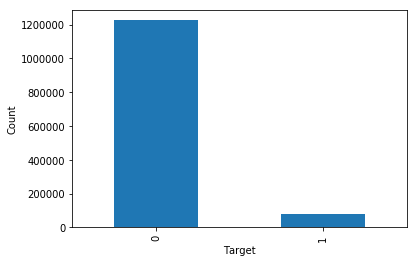

In [10]:
target_count = train_df['target'].value_counts()
target_count.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Target')

## ngrams 

In [14]:
insincere_df = train_df[train_df['target']==1]
sincere_df = train_df[train_df['target']==0]

In [15]:
insincere_df.head()

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


In [44]:
def get_ngrams_df(texts, n=1):
    frequency = defaultdict(int)
    
    for text in texts:
        tokenized = [token for token in text.lower().split() if token != ' ' and token not in STOPWORDS]
        n_grams = ngrams(tokenized, n)
        for word in n_grams:
            words = ' '.join(word)
            frequency[words] += 1
    
    df = pd.DataFrame(sorted(frequency.items(), key=lambda x:x[1], reverse=True))
    df.columns = ['word', 'frequency']
    return df

In [52]:
insincere_unigram_df = get_ngrams_df(insincere_df['question_text'])
sincere_unigram_df = get_ngrams_df(sincere_df['question_text'])

In [53]:
insincere_unigram_df.head(10)

,word,frequency
0,people,11041
1,trump,4893
2,women,4760
3,will,4592
4,think,3774
5,many,3552
6,white,3354
7,men,3152
8,indian,2986
9,muslims,2832


In [54]:
sincere_unigram_df.head(10)

,word,frequency
0,best,60816
1,will,45675
2,people,37960
3,good,34827
4,one,28840
5,make,25696
6,think,21641
7,many,20788
8,much,20108
9,someone,19728


In [48]:
insincere_bigram_df = get_ngrams_df(insincere_df['question_text'], 2)
sincere_bigram_df = get_ngrams_df(sincere_df['question_text'], 2)

In [49]:
insincere_bigram_df.head(10)

,word,frequency
0,donald trump,1076
1,white people,674
2,black people,654
3,many people,383
4,united states,361
5,trump supporters,335
6,even though,335
7,year old,330
8,president trump,328
9,hillary clinton,305


In [50]:
sincere_bigram_df.head(10)

,word,frequency
0,best way,6973
1,year old,2972
2,will happen,2084
3,many people,1931
4,computer science,1870
5,even though,1859
6,known for?,1822
7,united states,1797
8,long take,1796
9,high school,1775


In [55]:
insincere_trigram_df = get_ngrams_df(insincere_df['question_text'], 3)
sincere_trigram_df = get_ngrams_df(sincere_df['question_text'], 3)

In [56]:
insincere_trigram_df.head(10)

,word,frequency
0,will donald trump,43
1,black lives matter,42
2,long will take,38
3,kim jong un,36
4,12 year old,35
5,14 year old,33
6,people still believe,33
7,united states america,31
8,think donald trump,30
9,ask stupid questions,30


In [57]:
sincere_trigram_df.head(10)

,word,frequency
0,tips someone starting,716
1,useful tips someone,713
2,someone starting work,713
3,advice give someone,640
4,give someone moving,519
5,good hotels short-term,519
6,hotels short-term business,519
7,short-term business travelers,519
8,good bad neighborhoods,515
9,best known for?,400


## word cloud 

Text(0.5,1,'Word cloud for sincere Quora questions')

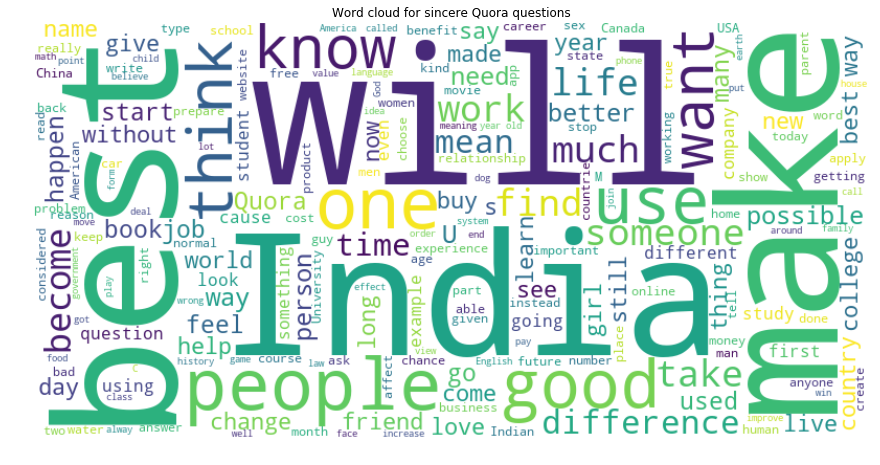

In [62]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html
# sincere questions
sincere_combined_text = train_df.loc[train_df.target==0]['question_text'].str.cat(sep=' ') 

sincere_word_cloud = WordCloud(background_color='white', width=800, height=400, stopwords = set(STOPWORDS))
sincere_word_cloud.generate(sincere_combined_text)
sincere_word_cloud.to_file('./Quora_sincere_wordcloud.pdf')

plt.figure(figsize=(15, 18))
plt.imshow(sincere_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for sincere Quora questions')

Text(0.5,1,'Word cloud for insincere Quora questions')

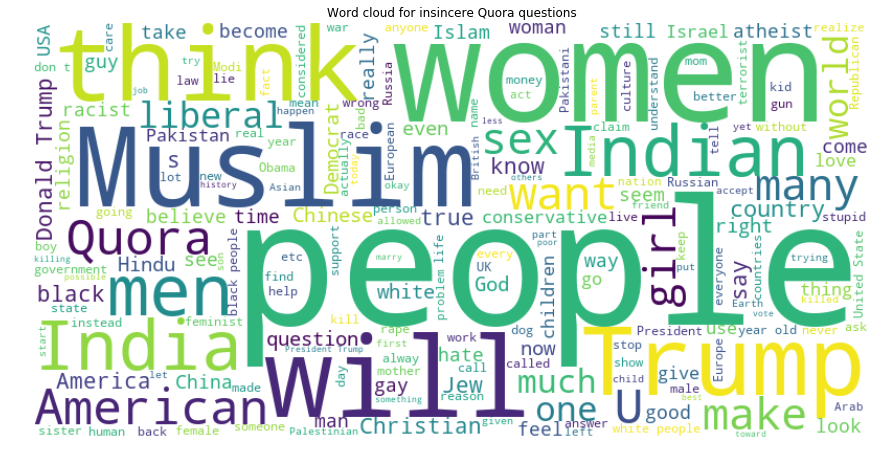

In [63]:
# insincere questions
insincere_combined_text = train_df.loc[train_df.target==1]['question_text'].str.cat(sep=' ') 

insincere_word_cloud = WordCloud(background_color='white', width=800, height=400, stopwords = set(STOPWORDS))
insincere_word_cloud.generate(insincere_combined_text)
insincere_word_cloud.to_file('./Quora_insincere_wordcloud.pdf')

plt.figure(figsize=(15, 18))
plt.imshow(insincere_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for insincere Quora questions')

## feature exploration

In [64]:
train_df['num_words'] = train_df['question_text'].apply(lambda x: len(x.split()))
train_df['num_unique_words'] = train_df['question_text'].apply(lambda x: len(set(x.split())))
train_df['num_chars'] = train_df['question_text'].apply(lambda x: len(str(x)))
train_df['num_stopwords'] = train_df['question_text'].apply(lambda x: len([i for i in x.split() if i in STOPWORDS]))
train_df['num_punctuations'] = train_df['question_text'].apply(lambda x: len([i for i in x if i in string.punctuation]))
train_df['num_words_upper'] = train_df['question_text'].apply(lambda x: len([i for i in x if i.isupper()]))
train_df['mean_word_len'] = train_df['question_text'].apply(lambda x: np.mean([len(w) for w in x.split()]))

In [65]:
train_df.head()

,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,mean_word_len
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,13,72,6,1,2,4.615385
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,15,81,9,2,1,4.125000
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,8,67,1,2,2,5.800000
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,9,57,2,1,4,5.444444
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,15,77,5,1,3,4.200000


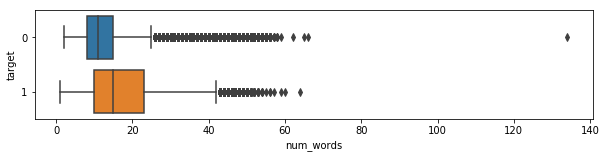

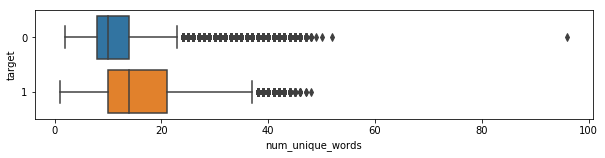

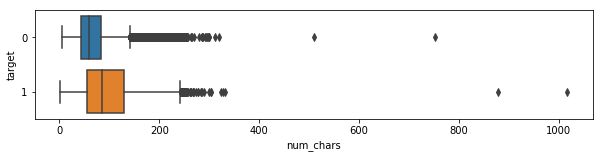

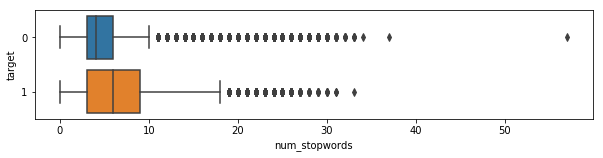

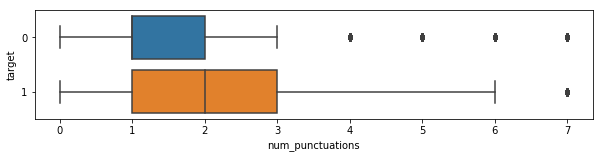

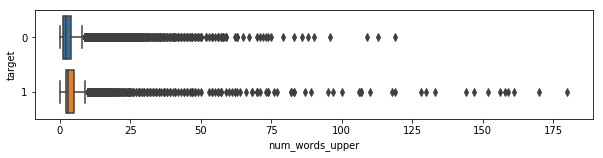

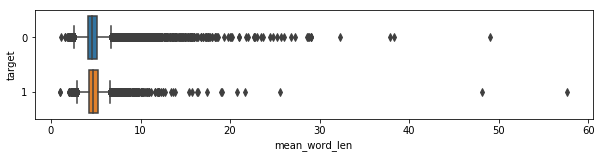

In [68]:
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_words', y='target', data=train_df, orient='h')

fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_unique_words', y='target', data=train_df, orient='h')

fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_chars', y='target', data=train_df, orient='h')

fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_stopwords', y='target', data=train_df, orient='h')

fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_punctuations', y='target', data=train_df[train_df['num_punctuations']<train_df['num_punctuations'].quantile(.99)], orient='h')

fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_words_upper', y='target', data=train_df, orient='h')

fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='mean_word_len', y='target', data=train_df, orient='h')